# Laboratorio 4 #

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

## Funciones Predeterminadas ##

Cargamos las funciones que vamos a usar en el laboratorio

In [2]:
def linear_cost(X, y, theta):
    h = X @ theta
    return ((y-h)**2).sum()/ (2 * len(X))

def linear_cost_gradient(X, y, theta):
    h = X @ theta
    return (X.T @ (h-y))/ len(X)

def gradient_descent(X, y, theta_0, linear_cost, linear_cost_gradient, learning_rate = 0.0001, threshold = 0.001, max_iter = 10000):
    theta = theta_0
    iteration = 0
    costs = []
    thetas = []
    
    while np.linalg.norm(linear_cost_gradient(X, y, theta)) > threshold and iteration < max_iter:
        iteration += 1
        theta =  theta - (learning_rate * linear_cost_gradient(X, y, theta))
        costs.append(linear_cost(X, y, theta))
        thetas.append(theta.copy)
    return theta, costs, thetas

## Dataset ##

Descargamos el dataset, lo observamos y agregamos la variable de unos. Además de eliminar las variables que no usaremos (únicamente necesitaremos las de Precio y Pies Cuadrados por Habitante)

In [3]:
dataset = pd.read_csv('kc_house_data.csv')
dataset.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
dataset['unos'] = 1
cols = dataset.columns.tolist()
cols = cols[-1:] + cols[:-1]
dataset = dataset[cols]
dataset = dataset[['unos', 'sqft_living', 'price']]
dataset.head(5)

,unos,sqft_living,price
0,1,1180,221900.0
1,1,2570,538000.0
2,1,770,180000.0
3,1,1960,604000.0
4,1,1680,510000.0


## Variables polonómicas y separación de variables ##

"Revolvemos" los datos para que no estén todos en el orden que nos los da el dataset y luego agregamos la variable de segundo grado y separamos en X y Y

In [5]:
dataset['sqft_living2'] = dataset['sqft_living']**2
dataset['sqft_living3'] = dataset['sqft_living']**3
dataset['sqft_living4'] = dataset['sqft_living']**4
dataset['sqft_living5'] = dataset['sqft_living']**5

In [6]:
y = dataset[['price']].to_numpy()
X = dataset[['unos', 'sqft_living', 'sqft_living2']].to_numpy()
print(X.shape, y.shape)

(21613, 3) (21613, 1)


## Train, Test y Cross Validaton ##

Separamos las variables en train, test y CV, después de hacer el shuffle y crear los thetas. 

In [7]:
m, n = X.shape
theta_0 = np.random.rand(n, 1)
print(theta_0.shape)

(3, 1)


In [8]:
np.random.shuffle(X)
np.random.shuffle(y)

In [9]:
X_train = X[:12968]
y_train = y[:12968]
X_test = X[12968:17290]
y_test = y[12968:17290]
X_val = X[17290:21613]
y_val = y[17290:21613]

print(X_train.shape, X_test.shape, X_val.shape)
print(y_train.shape, y_test.shape, y_val.shape)

(12968, 3) (4322, 3) (4323, 3)
(12968, 1) (4322, 1) (4323, 1)


# Prueba de Polinomios #

## Polinomio de Grado 2 ##

In [10]:
theta_2, costs_2, thetas_2 = gradient_descent(X_train, y_train, theta_0, linear_cost,
                                              linear_cost_gradient, learning_rate = 0.000000000000001,
                                              threshold = 0.001, max_iter = 50)

50


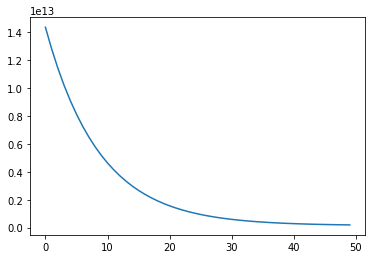

In [11]:
print(len(costs_2))
plt.plot(costs_2)

In [12]:
print(costs_2[len(costs_2)-1])

196397971570.3144


## Polinomio de Grado 3 ##

Tenemos que modificar los datos nuevos para que cada variable X y Y tenga la nueva variable polinomial agrandada por lo que se repite el proceso usado.

In [13]:
y2 = dataset[['price']].to_numpy()
X2 = dataset[['unos', 'sqft_living', 'sqft_living2', 'sqft_living3']].to_numpy()
print(X2.shape, y2.shape)

(21613, 4) (21613, 1)


In [14]:
m2, n2 = X2.shape
theta_02 = np.random.rand(n2, 1)
print(theta_02.shape)

(4, 1)


In [15]:
np.random.shuffle(X2)
np.random.shuffle(y2)

In [16]:
X_train2 = X2[:12968]
y_train2 = y2[:12968]
X_test2 = X2[12968:17290]
y_test2 = y2[12968:17290]
X_val2 = X2[17290:21613]
y_val2 = y2[17290:21613]

print(X_train2.shape, X_test2.shape, X_val2.shape)
print(y_train2.shape, y_test2.shape, y_val2.shape)

(12968, 4) (4322, 4) (4323, 4)
(12968, 1) (4322, 1) (4323, 1)


In [17]:
theta_3, costs_3, thetas_3 = gradient_descent(X_train2, y_train2, theta_02, linear_cost,
                                              linear_cost_gradient,
                                              learning_rate = 0.00000000000000000000001,
                                              threshold = 0.001, max_iter = 50)

50


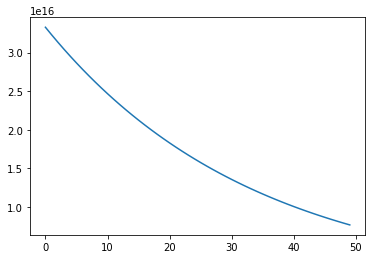

In [18]:
print(len(costs_3))
plt.plot(costs_3)

In [19]:
print(costs_3[len(costs_3)-1])

7682217296846636.0


## Polinomio de Grado 4 ##

In [20]:
y3 = dataset[['price']].to_numpy()
X3 = dataset[['unos', 'sqft_living', 'sqft_living2', 'sqft_living3', 'sqft_living4']].to_numpy()
print(X3.shape, y3.shape)

(21613, 5) (21613, 1)


In [21]:
m3, n3 = X3.shape
theta_03 = np.random.rand(n3, 1)
print(theta_03.shape)

(5, 1)


In [22]:
X_train3 = X3[:12968]
y_train3 = y3[:12968]
X_test3 = X3[12968:17290]
y_test3 = y3[12968:17290]
X_val3 = X3[17290:21613]
y_val3 = y3[17290:21613]

print(X_train3.shape, X_test3.shape, X_val3.shape)
print(y_train3.shape, y_test3.shape, y_val3.shape)

(12968, 5) (4322, 5) (4323, 5)
(12968, 1) (4322, 1) (4323, 1)


In [23]:
theta_4, costs_4, thetas_4 = gradient_descent(X_train3, y_train3, theta_03, linear_cost,
                                              linear_cost_gradient,
                                              learning_rate = 0.0000000000000000000000000000000000000001,
                                              threshold = 0.001, max_iter = 50)

50


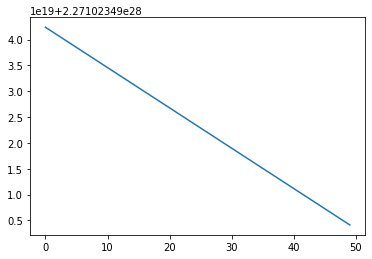

In [24]:
print(len(costs_4))
plt.plot(costs_4)

In [25]:
print(costs_4[len(costs_4)-1])

2.2710234904116595e+28


In [26]:
## Polinomio de Grado 5 ##

In [27]:
y4 = dataset[['price']].to_numpy()
X4 = dataset[['unos', 'sqft_living', 'sqft_living2', 'sqft_living3', 'sqft_living4', 'sqft_living5']].to_numpy()
print(X4.shape, y4.shape)

(21613, 6) (21613, 1)


In [28]:
m4, n4 = X4.shape
theta_04 = np.random.rand(n4, 1)
print(theta_04.shape)

(6, 1)


In [29]:
X_train4 = X4[:12968]
y_train4 = y4[:12968]
X_test4 = X4[12968:17290]
y_test4 = y4[12968:17290]
X_val4 = X4[17290:21613]
y_val4 = y4[17290:21613]

print(X_train4.shape, X_test4.shape, X_val4.shape)
print(y_train4.shape, y_test4.shape, y_val4.shape)

(12968, 6) (4322, 6) (4323, 6)
(12968, 1) (4322, 1) (4323, 1)


In [30]:
theta_5, costs_5, thetas_5 = gradient_descent(X_train4, y_train4, theta_04, linear_cost,
                                              linear_cost_gradient,
                                              learning_rate = 0.0000001,
                                              threshold = 0.001, max_iter = 50)

C:\Users\GUILLERMO\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in square
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\GUILLERMO\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in matmul
  import sys
C:\Users\GUILLERMO\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in matmul
  import sys


10


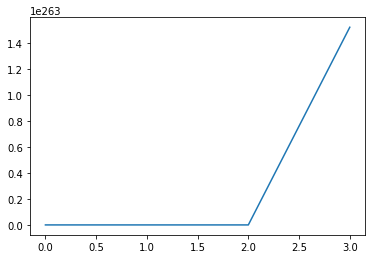

In [31]:
print(len(costs_5))
plt.plot(costs_5)

In [32]:
print(costs_5[len(costs_5)-1])

inf


Observamos que con el polinomio de grado 5 ya tenemos un error, por lo que consideramos que el polinomio de grado 3 es el mejor de los modelos.

In [45]:
cross_val = linear_cost(X_val2, y_val2, theta_3)
cost_test = linear_cost(X_test2, y_test2, theta_3)
print(cross_val)
print(cost_test)

4737096173039779.0
1.211120861241589e+16


In [46]:
cross_val2 = linear_cost(X_val3, y_val3, theta_4)
cost_test2 = linear_cost(X_test3, y_test2, theta_4)
print(cross_val2)
print(cost_test2)

4.979771111154945e+27
4.146269425079156e+27


In [47]:
cross_val3 = linear_cost(X_val, y_val, theta_2)
cost_test3 = linear_cost(X_test, y_test, theta_2)
print(cross_val3)
print(cost_test3)

193606437961.1712
181946910294.65347


In [48]:
cross_val4 = linear_cost(X_val4, y_val4, theta_5)
cost_test4 = linear_cost(X_test4, y_test4, theta_5)
print(cross_val4)
print(cost_test4)

inf
inf


C:\Users\GUILLERMO\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in square
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
Al 